In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

# EXPERIMENT 1 AND 2


           2
4.827e-14 x + 2.292e-07 x + 1.855


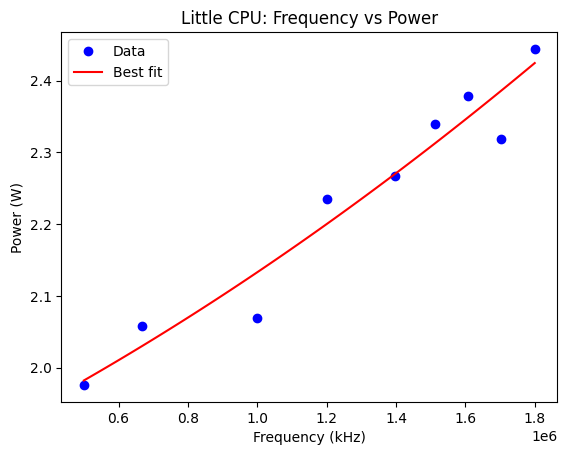

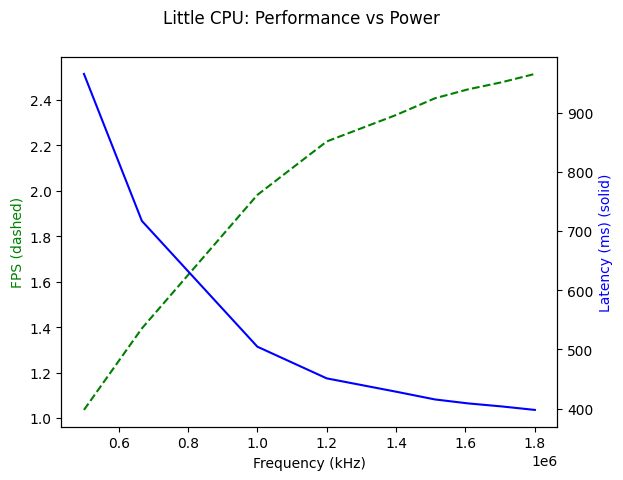

           2
6.998e-13 x - 7.705e-07 x + 2.523


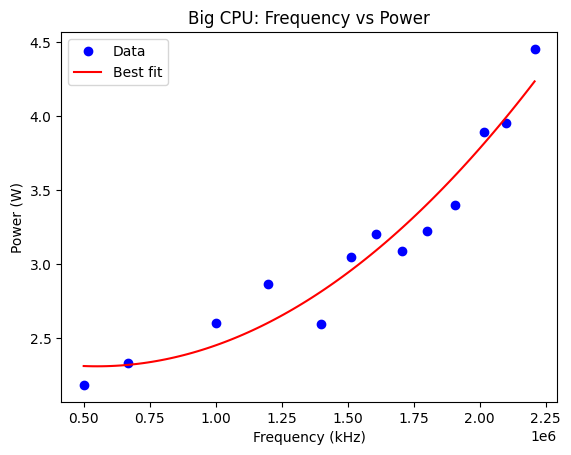

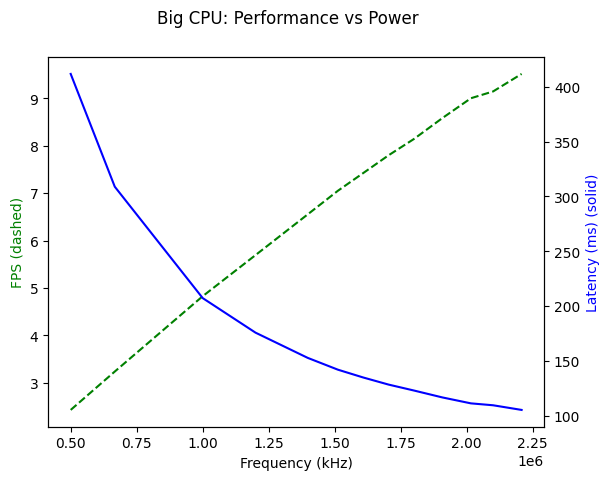

In [2]:
data1 = pd.read_csv("data/exp1_little_cpu_20260116_120131.csv", header=1)
data2 = pd.read_csv("data/exp2_big_cpu_20260116_121717.csv", header=1)

def calc_best_fit_parabula(x, y):
    z = np.polyfit(x, y, 2)
    p = np.poly1d(z)

    print(p)

    xs = np.linspace(min(x), max(x), 100)
    ys = p(xs)

    return xs, ys

xs_little, ys_little = calc_best_fit_parabula(data1["little_freq"], data1["watts"])

plt.plot(data1["little_freq"], data1["watts"], "o", color="b", label="Data")
plt.plot(xs_little, ys_little, "-", color="r", label="Best fit")
plt.title("Little CPU: Frequency vs Power")
plt.xlabel("Frequency (kHz)")
plt.ylabel("Power (W)")
plt.legend()
plt.show()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(data1["little_freq"], data1["fps"], "--", color="g")
ax2.plot(data1["little_freq"], data1["latency"], "-", color="b")

fig.suptitle("Little CPU: Performance vs Power")
ax1.set_xlabel("Frequency (kHz)")
ax1.set_ylabel("FPS (dashed)", color="g")
ax2.set_ylabel("Latency (ms) (solid)", color="b")

plt.show()

xs_big, ys_big = calc_best_fit_parabula(data2["big_freq"], data2["watts"])
plt.plot(data2["big_freq"], data2["watts"], "o", color="b", label="Data")
plt.plot(xs_big, ys_big, "r-", label="Best fit")
plt.title("Big CPU: Frequency vs Power")
plt.xlabel("Frequency (kHz)")
plt.ylabel("Power (W)")
plt.legend()
plt.show()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(data2["big_freq"], data2["fps"], "--", color="g")
ax2.plot(data2["big_freq"], data2["latency"], "-", color="b")

fig.suptitle("Big CPU: Performance vs Power")
ax1.set_xlabel("Frequency (kHz)")
ax1.set_ylabel("FPS (dashed)", color="g")
ax2.set_ylabel("Latency (ms) (solid)", color="b")

plt.show()

# EXPERIMENT 3

Best fit plane: watts = 2.382e-07 * big_freq + 8.388e-08 * little_freq + 2.638


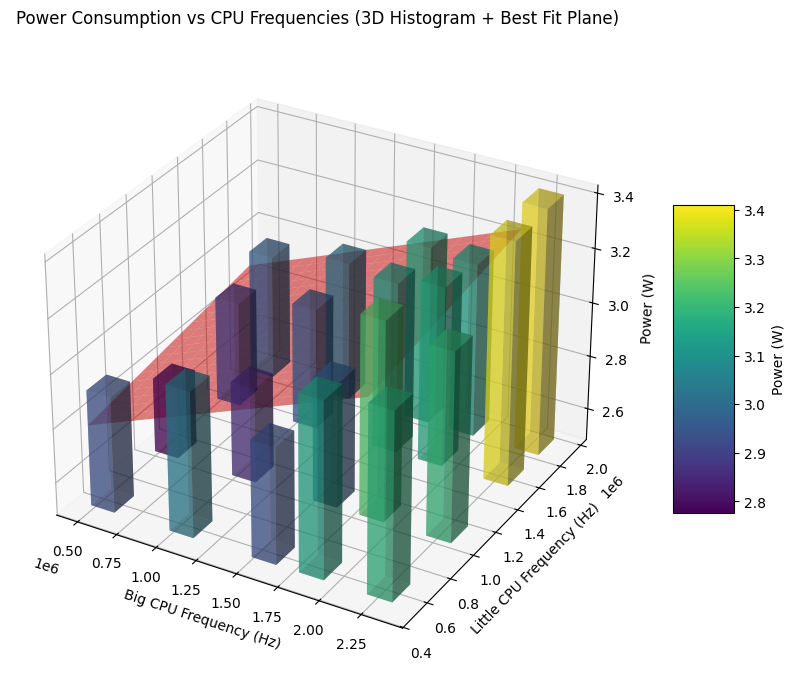

In [3]:
data3 = pd.read_csv("data/exp3_gpu_grid_20260117_194828.csv", header=1)

from mpl_toolkits.mplot3d import Axes3D

big_freqs = data3["big_freq"].values
little_freqs = data3["little_freq"].values
watts = data3["watts"].values

A = np.column_stack([big_freqs, little_freqs, np.ones_like(watts)])
coeffs, _, _, _ = np.linalg.lstsq(A, watts, rcond=None)
a, b, c = coeffs

print(f"Best fit plane: watts = {a:.3e} * big_freq + {b:.3e} * little_freq + {c:.3f}")

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

big_freq_unique = np.sort(np.unique(big_freqs))
little_freq_unique = np.sort(np.unique(little_freqs))
dx = (big_freq_unique[1] - big_freq_unique[0]) * 0.3 if len(big_freq_unique) > 1 else 50000
dy = (little_freq_unique[1] - little_freq_unique[0]) * 0.3 if len(little_freq_unique) > 1 else 50000

z_base = 2.5
dz = watts - z_base

colors = plt.cm.viridis((watts - watts.min()) / (watts.max() - watts.min()))
ax.bar3d(big_freqs, little_freqs, np.full_like(watts, z_base), dx, dy, dz, color=colors, alpha=0.5)

big_range = np.linspace(big_freqs.min(), big_freqs.max(), 20)
little_range = np.linspace(little_freqs.min(), little_freqs.max(), 20)
X_plane, Y_plane = np.meshgrid(big_range, little_range)
Z_plane = a * X_plane + b * Y_plane + c

ax.plot_surface(X_plane, Y_plane, Z_plane, alpha=0.5, color='red', edgecolor='none')

ax.set_xlabel('Big CPU Frequency (Hz)', fontsize=10)
ax.set_ylabel('Little CPU Frequency (Hz)', fontsize=10)
ax.set_zlabel('Power (W)', fontsize=10)
ax.set_title('Power Consumption vs CPU Frequencies (3D Histogram + Best Fit Plane)', fontsize=12, pad=20)

mappable = plt.cm.ScalarMappable(cmap='viridis')
mappable.set_array(watts)
fig.colorbar(mappable, ax=ax, shrink=0.5, aspect=5, label='Power (W)')

plt.show()

Best fit plane: watts = 9.412e-07 * big_freq + -3.230e-08 * little_freq + 9.331


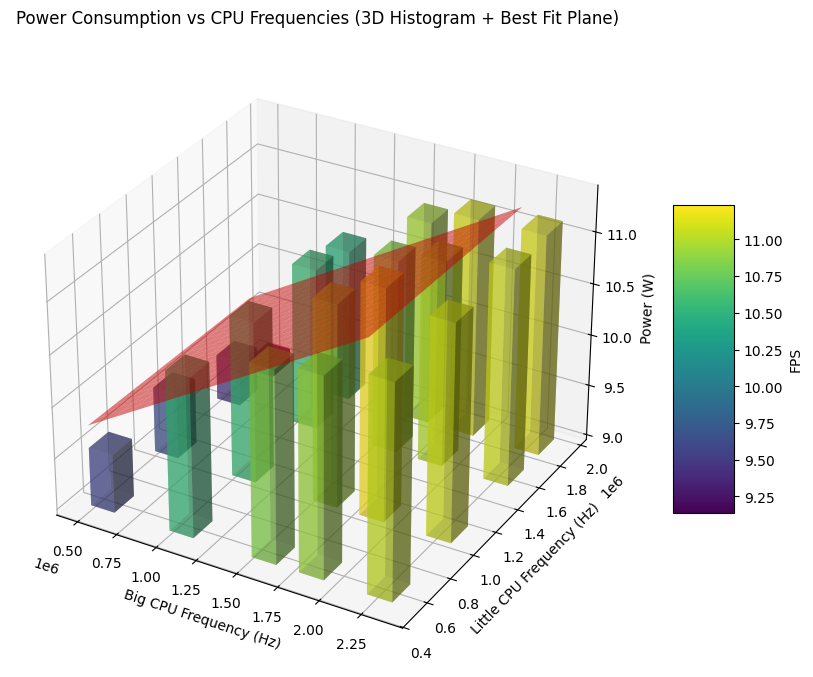

In [4]:
data3 = pd.read_csv("data/exp3_gpu_grid_20260117_194828.csv", header=1)

big_freqs = data3["big_freq"].values
little_freqs = data3["little_freq"].values
fps = data3["fps"].values

A = np.column_stack([big_freqs, little_freqs, np.ones_like(fps)])
coeffs, _, _, _ = np.linalg.lstsq(A, fps, rcond=None)
a, b, c = coeffs

print(f"Best fit plane: watts = {a:.3e} * big_freq + {b:.3e} * little_freq + {c:.3f}")

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

big_freq_unique = np.sort(np.unique(big_freqs))
little_freq_unique = np.sort(np.unique(little_freqs))
dx = (big_freq_unique[1] - big_freq_unique[0]) * 0.3 if len(big_freq_unique) > 1 else 50000
dy = (little_freq_unique[1] - little_freq_unique[0]) * 0.3 if len(little_freq_unique) > 1 else 50000

z_base = 9
dz = fps - z_base

colors = plt.cm.viridis((fps - fps.min()) / (fps.max() - fps.min()))
ax.bar3d(big_freqs, little_freqs, np.full_like(fps, z_base), dx, dy, dz, color=colors, alpha=0.5)

big_range = np.linspace(big_freqs.min(), big_freqs.max(), 20)
little_range = np.linspace(little_freqs.min(), little_freqs.max(), 20)
X_plane, Y_plane = np.meshgrid(big_range, little_range)
Z_plane = a * X_plane + b * Y_plane + c

ax.plot_surface(X_plane, Y_plane, Z_plane, alpha=0.5, color='red', edgecolor='none')

ax.set_xlabel('Big CPU Frequency (Hz)', fontsize=10)
ax.set_ylabel('Little CPU Frequency (Hz)', fontsize=10)
ax.set_zlabel('Power (W)', fontsize=10)
ax.set_title('Power Consumption vs CPU Frequencies (3D Histogram + Best Fit Plane)', fontsize=12, pad=20)

mappable = plt.cm.ScalarMappable(cmap='viridis')
mappable.set_array(fps)
fig.colorbar(mappable, ax=ax, shrink=0.5, aspect=5, label='FPS')

plt.show()

Best fit plane: watts = -8.896e-06 * big_freq + 4.656e-07 * little_freq + 106.502


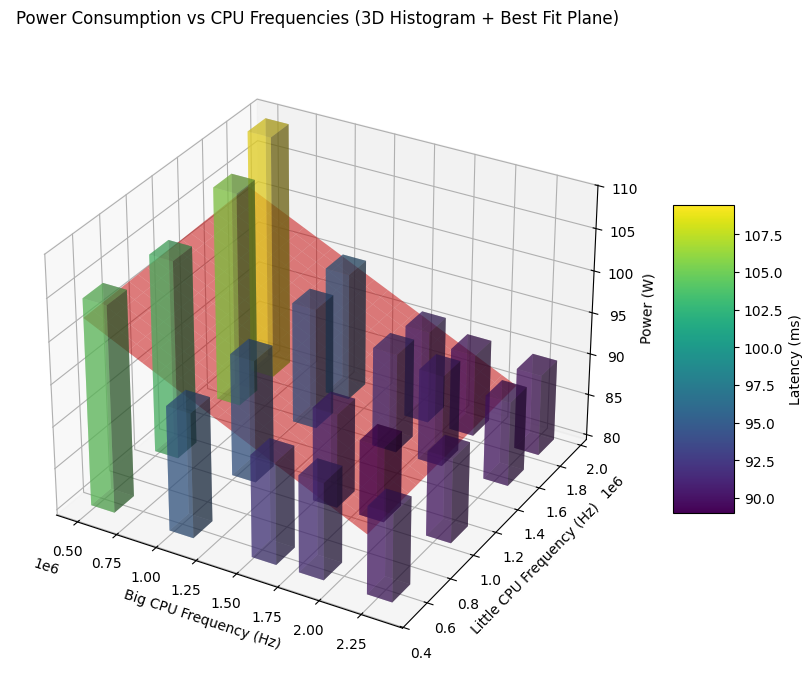

In [5]:
data3 = pd.read_csv("data/exp3_gpu_grid_20260117_194828.csv", header=1)

big_freqs = data3["big_freq"].values
little_freqs = data3["little_freq"].values
latency = data3["latency"].values

A = np.column_stack([big_freqs, little_freqs, np.ones_like(latency)])
coeffs, _, _, _ = np.linalg.lstsq(A, latency, rcond=None)
a, b, c = coeffs

print(f"Best fit plane: watts = {a:.3e} * big_freq + {b:.3e} * little_freq + {c:.3f}")

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

big_freq_unique = np.sort(np.unique(big_freqs))
little_freq_unique = np.sort(np.unique(little_freqs))
dx = (big_freq_unique[1] - big_freq_unique[0]) * 0.3 if len(big_freq_unique) > 1 else 50000
dy = (little_freq_unique[1] - little_freq_unique[0]) * 0.3 if len(little_freq_unique) > 1 else 50000

z_base = 80
dz = latency - z_base

colors = plt.cm.viridis((latency - latency.min()) / (latency.max() - latency.min()))
ax.bar3d(big_freqs, little_freqs, np.full_like(latency, z_base), dx, dy, dz, color=colors, alpha=0.5)

big_range = np.linspace(big_freqs.min(), big_freqs.max(), 20)
little_range = np.linspace(little_freqs.min(), little_freqs.max(), 20)
X_plane, Y_plane = np.meshgrid(big_range, little_range)
Z_plane = a * X_plane + b * Y_plane + c

ax.plot_surface(X_plane, Y_plane, Z_plane, alpha=0.5, color='red', edgecolor='none')

ax.set_xlabel('Big CPU Frequency (Hz)', fontsize=10)
ax.set_ylabel('Little CPU Frequency (Hz)', fontsize=10)
ax.set_zlabel('Power (W)', fontsize=10)
ax.set_title('Power Consumption vs CPU Frequencies (3D Histogram + Best Fit Plane)', fontsize=12, pad=20)

mappable = plt.cm.ScalarMappable(cmap='viridis')
mappable.set_array(latency)
fig.colorbar(mappable, ax=ax, shrink=0.5, aspect=5, label='Latency (ms)')

plt.show()

# EXPERIMENT 4

big


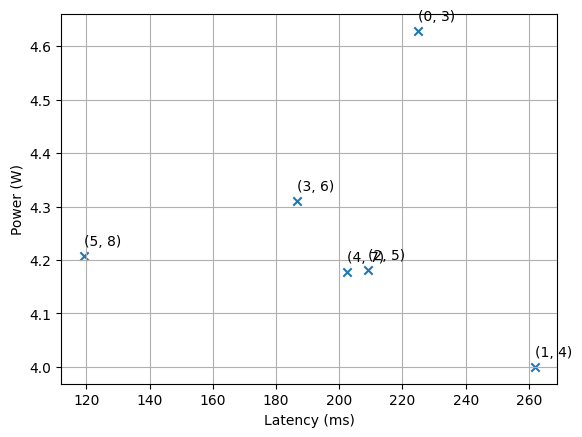

little


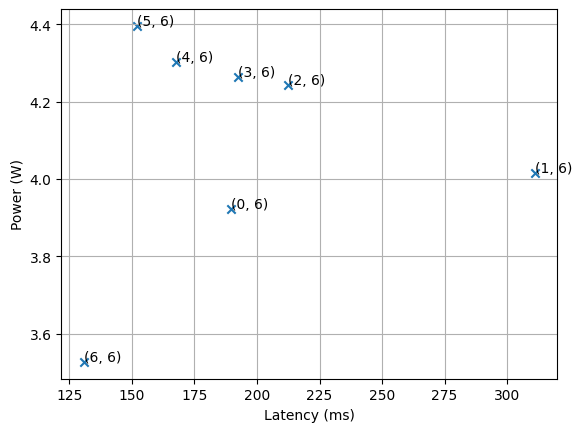

gpu


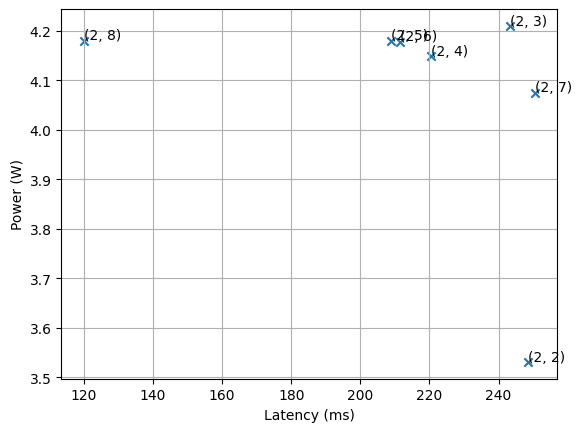

In [19]:
data_bcpu = pd.read_csv("data/exp4_fixedbCPU_partition_points_20260119_144724.csv", header=1)
data_lcpu = pd.read_csv("data/exp4_fixedlCPU_partition_points_20260119_133017.csv", header=1)
data_gpu = pd.read_csv("data/exp4_fixedGPU_partition_points_20260119_112302.csv", header=1)


def plot_exp4(data, xdata, ydata, xlabel=None, ylabel=None, dx=0.1, dy=0.1):

    if xlabel is None:
        xlabel = xdata
    if ylabel is None:
        ylabel = ydata

    plt.scatter(data[xdata], data[ydata], marker="x")

    for i, row in data.iterrows():
        plt.annotate(f"({row['pp1']}, {row['pp2']})", (row[xdata]+dx, row[ydata]+dy))

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()


print("big")
plot_exp4(data_bcpu, "latency", "watts", "Latency (ms)", "Power (W)", dx=0.02, dy=0.02)
print("little")
plot_exp4(data_lcpu, "latency", "watts", "Latency (ms)", "Power (W)", dx=0.002, dy=0.002)
print("gpu")
plot_exp4(data_gpu, "latency", "watts", "Latency (ms)", "Power (W)", dx=0.002, dy=0.002)
#plot_exp4(data, "fps", "watts", "Throughput (FPS)", "Power (W)", dx=0.02, dy=0.02)
#plot_exp4(data2, "fps", "watts", "Throughput (FPS)", "Power (W)", dx=0.002, dy=0.002)
#plot_exp4(data, "fps", "latency", "Throughput (FPS)", "Latency (ms)", dx=0.02, dy=0.02)
#plot_exp4(data2, "fps", "latency", "Throughput (FPS)", "Latency (ms)", dx=0.002, dy=0.002)


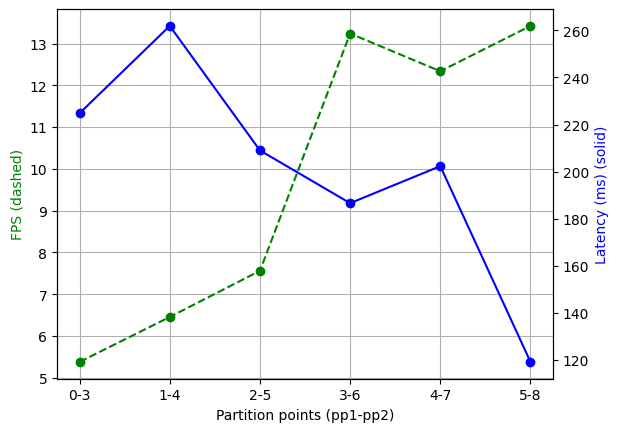

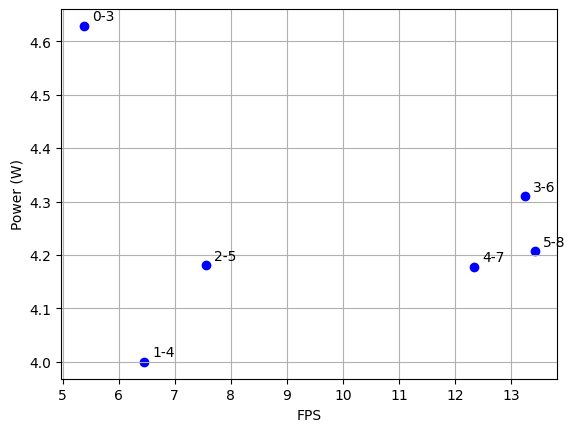

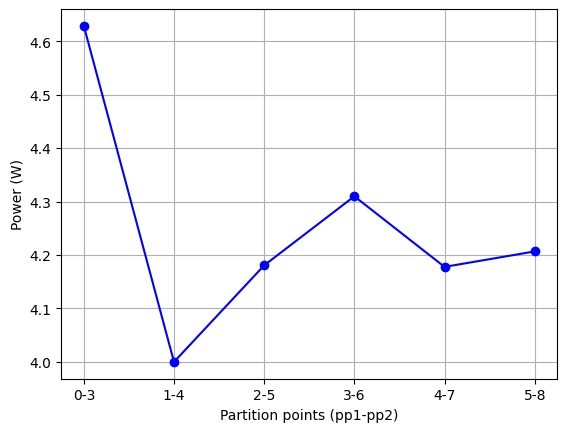

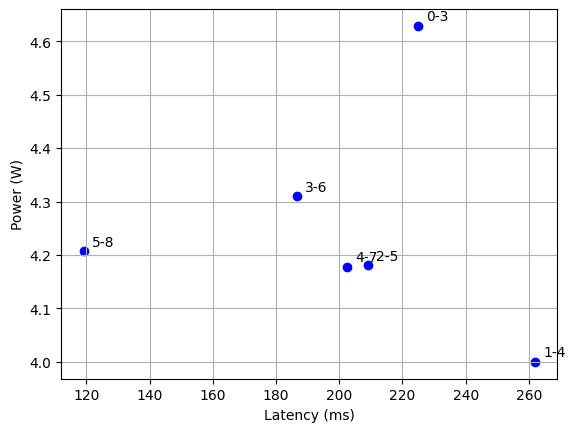

In [20]:
data_gpu["pp_index"] = data_gpu["pp2"]
data_gpu["pp_label"] = data_gpu["pp1"].astype(str) + "-" + data_gpu["pp2"].astype(str)
data_gpu = data_gpu.sort_values("pp_index")

data_lcpu["pp_index"] = data_lcpu["pp1"]
data_lcpu["pp_label"] = data_lcpu["pp1"].astype(str) + "-" + data_lcpu["pp2"].astype(str)
data_lcpu = data_lcpu.sort_values("pp_index")

data_bcpu["pp_index"] = data_bcpu["pp1"]
data_bcpu["pp_label"] = data_bcpu["pp1"].astype(str) + "-" + data_bcpu["pp2"].astype(str)
data_bcpu = data_bcpu.sort_values("pp_index")

def plot_partition_power(data):
    plt.figure()
    plt.plot(data["pp_index"], data["watts"], "o-", color="b")
    plt.xlabel("Partition points (pp1-pp2)")
    plt.ylabel("Power (W)")
    plt.xticks(data["pp_index"], data["pp_label"])
    plt.grid(True)
    plt.show()


def plot_partition_throughput_latency(data):
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()

    ax1.plot(data["pp_index"], data["fps"], "--", color="g", marker="o")
    ax2.plot(data["pp_index"], data["latency"], "-", color="b", marker="o")
    ax1.set_xlabel("Partition points (pp1-pp2)")
    ax1.set_ylabel("FPS (dashed)", color="g")
    ax2.set_ylabel("Latency (ms) (solid)", color="b")
    ax1.grid(True)

    ax1.set_xticks(data["pp_index"])
    ax1.set_xticklabels(data["pp_label"])

    plt.show()


def plot_power_throughput(data):
    plt.figure()
    plt.scatter(data["fps"], data["watts"], color="b")
    for _, r in data.iterrows():
        plt.annotate(r["pp_label"], (r["fps"], r["watts"]),
                    textcoords="offset points", xytext=(6,4))
    plt.xlabel("FPS")
    plt.ylabel("Power (W)")
    plt.grid(True)
    plt.show()


def plot_latency_power(data):
    plt.figure()
    plt.scatter(data["latency"], data["watts"], color="b")
    for _, r in data.iterrows():
        plt.annotate(r["pp_label"], (r["latency"], r["watts"]),
                    textcoords="offset points", xytext=(6,4))
    plt.xlabel("Latency (ms)")
    plt.ylabel("Power (W)")
    plt.grid(True)
    plt.show()


plot_partition_throughput_latency(data_bcpu)
plot_power_throughput(data_bcpu)
plot_partition_power(data_bcpu)
plot_latency_power(data_bcpu)


# EXPERIMENT 5

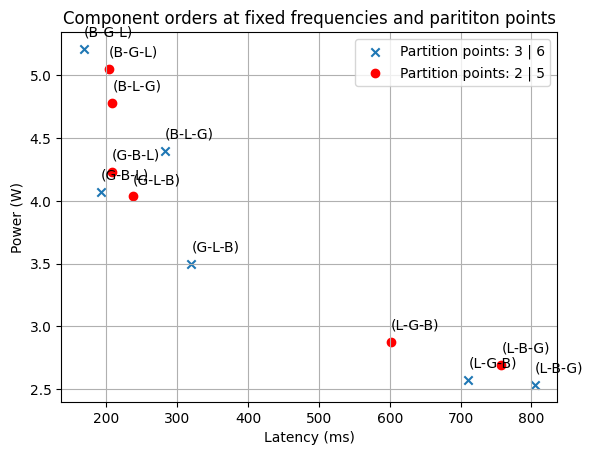

In [ ]:
data = pd.read_csv("data/exp5_orders_20260117_185500.csv", header=1)
data2 = pd.read_csv("data/exp5_orders_20260118_115048.csv", header=1)

plt.scatter(data["latency"], data["watts"], marker="x", label="Partition points: 3 | 6")
plt.scatter(data2["latency"], data2["watts"], color="r", marker="o", label="Partition points: 2 | 5")

for i, row in data.iterrows():
    plt.annotate(f"({row['order']})", (row['latency']+0.1, row['watts']+0.1))

for i, row in data2.iterrows():
    plt.annotate(f"({row['order']})", (row['latency']+0.1, row['watts']+0.1))

plt.title("Component orders at fixed frequencies and parititon points")
plt.xlabel("Latency (ms)")
plt.ylabel("Power (W)")
plt.grid(True)
plt.legend()
plt.show()